# Solution sheet 1
## Exercise 1: solving ODEs
   * $\ddot{x}-2\dot{x}+x=0$: see http://www.wolframalpha.com/input/?i=solve+x%27%27%2B2x%27%2Bx%3D0+for+x
   * $\ddot{x}+x=0$: see http://www.wolframalpha.com/input/?i=solve+x%27%27%2Bx%3D0+for+x, and also https://en.wikipedia.org/wiki/Harmonic_oscillator
   * $t\dot{x}-\sqrt{1-x^{2}}=0$: see http://www.wolframalpha.com/input/?i=solve+t*x%27-sqrt(1-x%5E2)%3D0+for+x
   * $\dot{x}-\frac{\sqrt{1+x}}{t^{2}+4}=0$: see http://www.wolframalpha.com/input/?i=solve+x%27-sqrt(1%2Bx)%2F(t%5E2%2B4)%3D0+for+
   * $\dot{x}+\sin t\cdot x=\cos t$: see http://www.wolframalpha.com/input/?i=solve+x%27%2Bsin(t)*x%3Dcos(t)+for+x
   
## Exercise 2: matrix exponentials
Instead of solving the explicit example given on the exercise sheet, we will make up our own (random) one. The crucial observation here is that the given matrix is symmetric, and the approach is to diagonalize the matrix and then compute its matrix exponential in diagonal form. Let's start:

In [29]:
A = rand(3,3)

3×3 Array{Float64,2}:
 0.751574   0.85082   0.0136832
 0.648031   0.453541  0.281663 
 0.0576884  0.462235  0.194564 

Next, we symmetrize the matrix by replacing the lower triangular part by the uppertriangular part:

In [30]:
A = Symmetric(A)

3×3 Symmetric{Float64,Array{Float64,2}}:
 0.751574   0.85082   0.0136832
 0.85082    0.453541  0.281663 
 0.0136832  0.281663  0.194564 

and compute its eigenfactorization:

In [31]:
E = eigfact(A) # E is an eigfact-structure
λ = eigvals(E) # λ is the vector of eigenvalues (should be sorted from max to min, since A is symmetric)
V = eigvecs(E) # V is the matrix whose columns correspond to the eigenvectors
λ, V

([-0.343809, 0.248379, 1.49511], [0.566871 -0.349871 0.74582; -0.735774 0.192177 0.649388; 0.370531 0.916874 0.148487])

Let's see if the factorization is correct (up to numerical accuracy):

In [32]:
A ≈ V*Diagonal(λ)*V.'

true

Finally, let's confirm the validity of the ansatz, that you would have calculated by hands given a sufficiently simple (stupid?) example:

In [33]:
expm(A) ≈ V*Diagonal(exp.(λ))*V.'

true

As for the second example, the crucial observation is that the matrix is already given in Jordan normal form with a single Jordan block:

In [34]:
N = diagm(ones(2),1)
B = 2.0*eye(3) + N
N, B

([0.0 1.0 0.0; 0.0 0.0 1.0; 0.0 0.0 0.0], [2.0 1.0 0.0; 0.0 2.0 1.0; 0.0 0.0 2.0])

Let's verify that `N` is indeed nilpotent:

In [35]:
N^3 == zero(N) # zero(N) returns the zero element of the type of N, in this case 3x3 matrices

true

Since `B` and `N` commute (by the Jordan normal form theorem this is true in general), the matrix exponential of $\exp(B)=\exp(2I+N)=\exp(2)\exp(N)$, and the power series for $\exp(N)$ is finite because it is nilpotent. Thus, we end up with:

In [36]:
expm(B) ≈ exp(2.)*eye(3)*(eye(3)+N+.5*N^2)

true

The third example is quick. First, you easily verify that the matrix corresponds to the first-order ODE system corresponding to the harmonic oscillator discussed above. Now we make use of the fact that $\exp(tC)$ is the solution operator of $\dot{x} = Cx$. In our case, it must correspond to the rotation matrix.
Let's start by defining a time-dependent function:

In [37]:
C(t) = t*[0. 1.; -1. 0.]

C (generic function with 1 method)

Finally, we check for a couple of time instances:

In [38]:
for t in linspace(0.,100.,20)
    @show expm(C(t)) ≈ [cos(t) sin(t); -sin(t) cos(t)]
end

expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t); -(sin(t)) cos(t)] = true
expm(C(t)) ≈ [cos(t) sin(t);

## Exercise 3: persistence of non-degenerate roots
The problem was the following.
Consider the following polynomial $p\in C^1(I,\mathbb{R})$ as an element of the continuously differentiable real-valued functions on $I\subset\mathbb{R}$, where $I$ is some reasonable compact interval:
$$p_{\alpha}\colon x\mapsto x^{2}+\alpha.$$
Show that for $\alpha<0$ any root of $p_{\alpha}$ persists under small perturbations. As a more specific, simpler case, consider the same $p_{\alpha}$ and an $f\in C^1(I,\mathbb{R})$. Show that for $\varepsilon$ with $\lvert\varepsilon\rvert$ sufficiently small any $p_{\alpha}+\varepsilon f$ has (i) as many roots as $p_{\alpha}$, which are (ii) close to those of $p_{\alpha}$. What can we say for \alpha=0? And what about \alpha>0?

For $\alpha<0$, each root of $p_{\alpha}$ is non-degenerate, i.e., it is isolated and the derivative of $p_{\alpha}$ at the root doesn't vanish. The persistence of each root follows from an application of the Implicit Function Theorem to the function $F\colon (\varepsilon,x) \mapsto p_{\alpha}(x)+\varepsilon f(x)$. Namely, $F$ is continuously differentiable in its second argument in an $\mathbb{R}^2$-neighborhood of $(0,x^*)$, $F(0,x^*)=0$, and $\partial_2F(0,x^*)\neq 0$, where $x^*$ denotes any of the two roots of $p_{\alpha}$. Then the IFT guarantees the existence of an implicit function $\varepsilon\mapsto x(\varepsilon)$ such that $F(\varepsilon,x(\varepsilon))=0$, i.e., a continuation of the root. Moreover, any root is contained in the graph of the implicit function, so there are no others nearby. Away from the roots, the function $p_{\alpha}$ has a finite distance to zero, which cannot be overcome by sufficiently small perturbations.
The general case can be deduced from a Banach space-version of the IFT, applied to $F\colon C^1(I,\mathbb{R})\times\mathbb{R}\to\mathbb{R}$, $(f,x)\mapsto p_{\alpha}(x)+f(x)$. That is, for $f$ sufficiently small in the $C^1$-norm, the roots admit a continuously differentiable unique continuation, and no other root is created under perturbation.

For $\alpha\geq0$, $p_{\alpha}$ has either no root to begin with, or a degenerate one, which can be easily "perturbed away".

So far for the theoretical part, please make sure you recall the Implicit Function Theorem and connect it to the above quick arguments.

Let's finish this with a quick show of `julia`'s capabilities. :-) We aim at some visualization of the situation, so we need to load the `Plots` package and define a couple of obvious functions:

In [39]:
using Plots
β = -1.
pᵦ(x) = x.*x+β
root(β) = √(-β)
dpᵦ(x) = 2.*x

dpᵦ (generic function with 1 method)

Next, we generate a linspace of `x` values over which we wish to plot, and plot (i) the parabola, (ii) the zero level set, and (iii) the linear approximation to the parabola at the root:

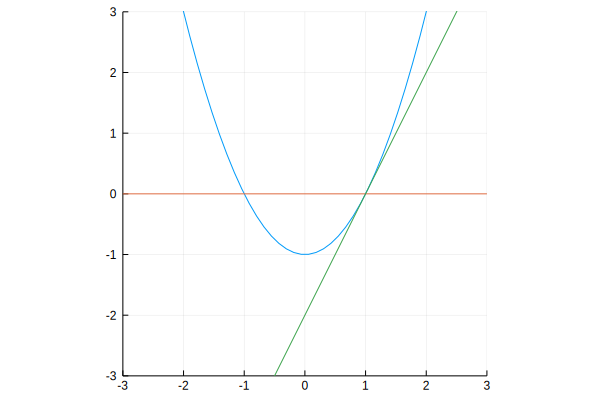

In [40]:
x = linspace(-3.,3.,50)
plot(x,pᵦ(x),ylims=(-3.,3.),aspect_ratio=1,leg=false)
plot!(x,zeros(x))
plot!(x,dpᵦ(root(β))*(x-root(β)))

The partial derivative condition in the IFT corresponds to checking whether the green line is the graph of an isomorphism from $\mathbb{R}$ to $\mathbb{R}$. This is clearly satisfied only for $\beta\neq 0$. To finish, let's make a fancy animation for $\beta$ between 0 and -3:

In [41]:
anim = @animate for β in linspace(0.,-3.,300)
    plot(x,pᵦ(x),xlims=(-3.,3.),ylims=(-3.,3.),
                    title="beta = $(round(β,3))")
    plot!(x,zeros(x),leg=false)
    plot!(x,dpᵦ(root(β))*(x-root(β)))
end

Plots.Animation("/var/folders/47/d2s07wmn4bx5y2lq0qsjgsyw0000gn/T/tmpk0RSYX", String["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000291.png", "000292.png", "000293.png", "000294.png", "000295.png", "000296.png", "000297.png", "000298.png", "000299.png", "000300.png"])

Lastly, we can safe the animation:

In [ ]:
gif(anim,"parabola.gif",fps=30)

Probably, the gif is not showing in the notebook, but you can find the result in the folder.